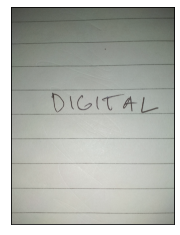

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Contoh.jpg')
plt.xticks([]),plt.yticks([])
plt.imshow(img)

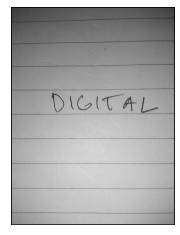

In [14]:
# Grayscale
gray = cv2.imread('Contoh.jpg', 0)
plt.xticks([]),plt.yticks([])
plt.imshow(gray, cmap='gray')

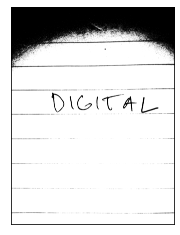

In [24]:
# Binary
ret,thresh = cv2.threshold(gray,125,255,cv2.THRESH_BINARY)
plt.xticks([]),plt.yticks([])
plt.imshow(thresh, cmap='gray')

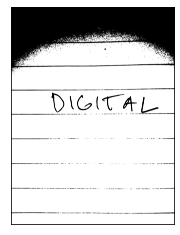

In [33]:
# Morfologi
erode = cv2.erode(thresh.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (3, 6)))
plt.xticks([]),plt.yticks([])
plt.imshow(erode, cmap='gray')

+ x=2250, y=1820, w=43, h=105, rasio=0.41
+ x=817, y=1714, w=19, h=57, rasio=0.33
+ x=2230, y=1696, w=63, h=67, rasio=0.94
+ x=2090, y=1696, w=45, h=64, rasio=0.70
+ x=2398, y=1686, w=15, h=123, rasio=0.12
+ x=931, y=1668, w=13, h=52, rasio=0.25
+ x=2350, y=1644, w=19, h=330, rasio=0.06
+ x=1273, y=1680, w=192, h=196, rasio=0.98
+ x=2157, y=540, w=89, h=100, rasio=0.89


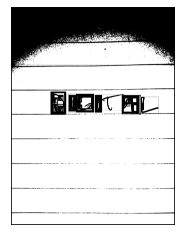

In [144]:
# Ekstraksi Kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    # print("x={}, y={}, w={}, h={}, rasio={}".format(x, y, w, h, ras))
    if h >= 40 and w >= 10 and float(ras) <= 1:
        # Gambar segiempat hasil segmentasi warna merah
        cv2.rectangle(erode, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
        print("+ x={}, y={}, w={}, h={}, rasio={}".format(x, y, w, h, ras))
plt.xticks([]),plt.yticks([])
plt.imshow(erode, cmap='gray')

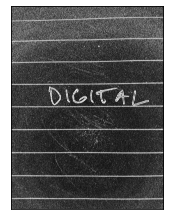

In [88]:
sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)
abs_sobelx = cv2.convertScaleAbs(sobelx)
abs_sobely = cv2.convertScaleAbs(sobely)
sobel = cv2.addWeighted(abs_sobelx, 0.5, abs_sobely, 0.5, 0)

plt.subplot(121),plt.imshow(sobel,cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

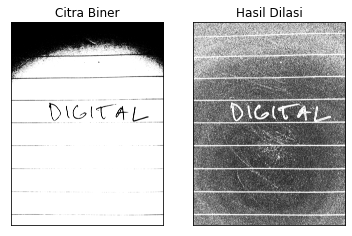

In [93]:
kernel = np.ones((5,5),np.uint8)
dilasi = cv2.dilate(sobel,kernel,iterations = 1)

plt.subplot(121),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi,cmap = 'gray')
plt.title('Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

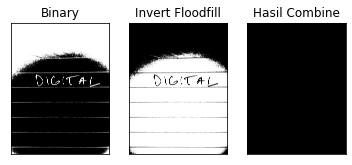

In [145]:
im_in = cv2.imread("Contoh.jpg", cv2.IMREAD_GRAYSCALE);
 
# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.
 
th, im_th = cv2.threshold(im_in, 150, 255, cv2.THRESH_BINARY_INV);
 
# Copy the thresholded image.
im_floodfill = im_th.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv


plt.subplot(131),plt.imshow(im_th,cmap = 'gray')
plt.title('Binary'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(im_floodfill_inv,cmap = 'gray')
plt.title('Invert Floodfill'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(im_out,cmap = 'gray')
plt.title('Hasil Combine'), plt.xticks([]), plt.yticks([])
plt.show()